In [1]:
import time
import pandas as pd
import numpy as np

from itertools import product
from sklearn.metrics import mean_squared_error

In [2]:
start = time.time()

# Import relevant data

In [3]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col = 0, parse_dates = True)
data = raw[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna()

In [4]:
aapl = (pd.read_csv('apple_output.csv', index_col = 0, parse_dates = True)).dropna().iloc[:, 1:]
AAPL = (pd.DataFrame(data['AAPL.O']).join(aapl, how = 'left')).dropna()
AAPL

,AAPL.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA
Date,,,,,,,,,,,,
2010-01-04,30.572827,81.3819,78.0429,69.6459,30.2438,87.1666,28.5714,100.0000,7.815824e+10,5.242860e+10,6.2074,6.2604
2010-01-06,30.138541,70.6672,77.9169,70.3530,32.1805,52.0135,14.2857,92.8571,7.820798e+10,5.191009e+10,6.3276,6.3344
2010-01-07,30.082827,47.7707,66.7131,62.5820,30.9912,3.9476,7.1429,85.7143,7.773085e+10,5.192788e+10,6.3649,6.3467
2010-01-11,30.015684,30.4817,37.7213,63.0963,29.4253,-69.1548,0.0000,71.4286,7.771623e+10,5.224445e+10,6.4202,6.3642
2010-01-12,29.674256,27.6022,30.9984,53.7582,27.5182,-162.4372,0.0000,64.2857,7.712177e+10,5.211136e+10,6.4125,6.3569
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,24.7765,28.7326,33.5305,28.2742,-132.0057,100.0000,14.2857,9.108196e+10,7.277260e+10,44.7743,44.5714
2018-06-26,184.430000,30.9769,28.9171,32.5318,28.2014,-70.9622,92.8571,7.1429,9.118024e+10,7.276743e+10,44.5744,44.3849
2018-06-27,184.160000,37.4891,31.0808,42.8627,27.4502,-43.5508,85.7143,0.0000,9.107910e+10,7.267438e+10,44.4033,44.3292


In [5]:
msft = (pd.read_csv('microsoft_output.csv', index_col = 0, parse_dates = True)).dropna().iloc[:,1:]
MSFT = (pd.DataFrame(data['MSFT.O']).join(msft, how = 'left')).dropna()
MSFT

,MSFT.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA
Date,,,,,,,,,,,,
2010-01-04,30.950,26.4706,46.8808,55.2252,25.3820,14.2157,28.5714,78.5714,-16571096.0,-7.144622e+09,23.2818,23.2624
2010-01-06,30.770,42.9799,33.4987,60.4486,22.0632,-62.9946,14.2857,64.2857,-25003896.0,-7.131389e+09,23.3946,23.2972
2010-01-07,30.452,37.2175,37.0811,53.1775,21.0297,-177.2098,7.1429,57.1429,-75563596.0,-7.130001e+09,23.3969,23.2775
2010-01-11,30.270,31.9152,35.9600,54.5705,18.0113,-119.6051,0.0000,42.8571,-93120896.0,-7.150528e+09,23.3515,23.2197
2010-01-12,30.070,26.8766,32.5130,43.4403,17.9729,-142.4015,100.0000,35.7143,-159032996.0,-7.173395e+09,23.2871,23.1480
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,98.390,36.1002,51.6045,47.7111,18.6535,-211.9001,100.0000,14.2857,-744599609.0,-3.823874e+09,94.8803,94.6967
2018-06-26,99.080,28.9721,40.1854,41.0082,20.4706,-112.7838,92.8571,7.1429,-717702365.0,-3.837423e+09,94.6660,94.3661
2018-06-27,97.540,19.8773,28.3165,46.3974,23.2159,-141.2104,85.7143,0.0000,-749000751.0,-3.865377e+09,94.4649,94.2254


In [6]:
intc = (pd.read_csv('intel_output.csv', index_col = 0, parse_dates = True)).dropna().iloc[:,1:]
INTC = (pd.DataFrame(data['INTC.O']).join(intc, how = 'left')).dropna()
INTC

,INTC.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA
Date,,,,,,,,,,,,
2010-01-04,20.880,74.6205,79.3600,68.1343,29.3039,150.0651,42.8571,100.0000,1.058025e+08,-5.704232e+09,13.2334,13.2972
2010-01-06,20.800,77.7571,73.6387,65.8003,31.5598,96.5420,28.5714,85.7143,1.340737e+07,-5.684094e+09,13.4011,13.4195
2010-01-07,20.600,62.7313,69.6757,62.9342,30.1265,17.0467,21.4286,78.5714,-4.063413e+07,-5.671227e+09,13.4391,13.4481
2010-01-11,20.950,61.3348,61.2674,67.5852,29.7887,113.9171,7.1429,100.0000,5.868697e+07,-5.645642e+09,13.5301,13.5173
2010-01-12,20.608,59.8032,60.2914,60.3627,27.4632,-17.9461,0.0000,92.8571,-1.127143e+07,-5.654252e+09,13.5602,13.5448
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,50.710,16.5231,21.8288,32.3000,22.1620,-153.6915,100.0000,0.0000,2.904198e+09,-1.487095e+09,46.2450,45.9993
2018-06-26,49.670,15.5695,18.6922,28.1699,24.3297,-160.8763,100.0000,0.0000,2.866655e+09,-1.502469e+09,45.8223,45.4383
2018-06-27,48.760,7.8284,13.3070,26.3015,26.7441,-143.1246,100.0000,0.0000,2.833317e+09,-1.535299e+09,45.3378,44.8841


In [7]:
amzn = (pd.read_csv('amazon_output.csv', index_col = 0, parse_dates = True)).dropna().iloc[:,1:]
AMZN = (pd.DataFrame(data['AMZN.O']).join(amzn, how = 'left')).dropna()
AMZN

,AMZN.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA
Date,,,,,,,,,,,,
2010-01-04,133.900,11.3511,33.2850,53.0823,22.0443,-25.6630,35.7143,78.5714,1.245857e+10,2.002480e+10,6.7946,6.8256
2010-01-06,132.250,14.5602,12.5029,49.0869,18.8398,-106.9424,21.4286,64.2857,1.249203e+10,2.003806e+10,6.8428,6.7853
2010-01-07,130.000,16.5936,14.2504,42.9069,19.0253,-146.6153,14.2857,57.1429,1.227143e+10,1.996787e+10,6.8341,6.7517
2010-01-11,130.308,32.3882,25.6023,45.9835,17.5514,-96.6941,0.0000,42.8571,1.229245e+10,2.008277e+10,6.7800,6.6965
2010-01-12,127.350,30.9312,30.3815,38.2755,18.3311,-138.4548,100.0000,35.7143,1.211053e+10,1.998986e+10,6.7262,6.6516
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1663.150,28.7844,51.2296,53.7404,46.1234,-197.7752,100.0000,85.7143,2.248574e+10,3.437684e+10,85.9311,85.7731
2018-06-26,1691.090,25.7092,34.9854,44.5310,43.3708,-120.6630,92.8571,78.5714,2.257347e+10,3.441648e+10,85.8280,85.3813
2018-06-27,1660.510,21.6400,25.3779,54.7483,40.0760,-113.1170,85.7143,71.4286,2.247603e+10,3.432094e+10,85.8545,85.3857


In [8]:
gsn = (pd.read_csv('gs_output.csv', index_col = 0, parse_dates = True)).dropna().iloc[:,1:]
GSN = (pd.DataFrame(data['GS.N']).join(gsn, how = 'left')).dropna()
GSN

,GS.N,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA
Date,,,,,,,,,,,,
2010-01-04,173.08,85.5033,64.5942,64.2358,23.1497,223.3631,35.7143,100.0000,-218509800.0,8.179715e+08,129.2875,129.9609
2010-01-06,174.26,90.8572,88.7692,74.4671,28.1530,116.0743,21.4286,92.8571,-214231500.0,8.260477e+08,131.0724,132.1477
2010-01-07,177.67,91.3445,90.7162,69.7964,31.2759,115.2008,14.2857,100.0000,-205504100.0,8.308478e+08,131.7635,132.9544
2010-01-11,171.56,51.8162,72.9315,67.7686,33.4670,23.6492,0.0000,85.7143,-220477100.0,8.209085e+08,133.5131,134.4941
2010-01-12,167.82,23.7751,50.4083,50.7771,30.5741,-52.9105,35.7143,78.5714,-230837200.0,8.152931e+08,133.9816,134.2602
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,221.54,19.9620,20.9447,32.7234,22.7421,-152.1742,100.0000,42.8571,-240254198.0,6.437021e+08,201.4811,200.4351
2018-06-26,221.58,17.8048,19.8747,28.5329,24.4674,-140.4348,100.0000,35.7143,-237561311.0,6.446095e+08,200.4011,199.2830
2018-06-27,220.18,14.1021,17.2896,28.0921,24.3184,-105.2860,92.8571,28.5714,-240664932.0,6.415525e+08,199.3360,198.2927


# Split data to train and test

In [9]:
# split the dataset into 80 (training) / 20 (testing)
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,
                               test_size = 0.2,
                               shuffle = False,
                               random_state = 0) 

train_aapl, test_aapl = train_test_split(AAPL,
                               test_size = 0.2,
                               shuffle = False,
                               random_state = 0) 

train_msft, test_msft = train_test_split(MSFT,
                               test_size = 0.2,
                               shuffle = False,
                               random_state = 0)

train_intc, test_intc = train_test_split(INTC,
                               test_size = 0.2,
                               shuffle = False,
                               random_state = 0) 

train_amzn, test_amzn = train_test_split(AMZN,
                               test_size = 0.2,
                               shuffle = False,
                               random_state = 0) 

train_gsn, test_gsn = train_test_split(GSN,
                               test_size = 0.2,
                               shuffle = False,
                               random_state = 0)

# Define relevant functions and model

In [10]:
# define model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

LR_model = LinearRegression()
SFS_model = SequentialFeatureSelector(LR_model,
                                      scoring = 'r2')

In [11]:
# Stepwise regression to predict training data
def stepwise_regression_train(data):
    df = data.copy()
    
    # Stepwise regression select features
    X_train = df.iloc[:, 1:]    # training input
    y_train = df.iloc[:, 0]     # training expected output

    sel_X_bool = SFS_model.fit(X_train, y_train).get_support()    # boolean list of variables selected
    sel_X_train = X_train.loc[:, sel_X_bool]                      # filter variables
    
    # perform linear regression on the selected variables to predict training data
    df['Predict_Step'] = LR_model.fit(sel_X_train, y_train).predict(sel_X_train)
    
    print('Selected variables are ' + str(list(sel_X_train.columns)))
    return df

In [12]:
# Stepwise regression to predict testing data
def stepwise_regression_test(train, test):
    df_train = train.copy()
    df_test = test.copy()
    
    # Stepwise regression select features
    X_train = df_train.iloc[:, 1:]    # training input
    y_train = df_train.iloc[:, 0]     # training expected output
    
    sel_X_bool = SFS_model.fit(X_train, y_train).get_support()    # boolean list of variables selected
    sel_X_train = X_train.loc[:, sel_X_bool]                      # filter variables
    
    # Filter test data
    X_test = df_test.iloc[:, 1:]                                  # test input data
    sel_X_test = X_test.loc[:, sel_X_bool]                        # variables selected from training data
    
    # perform linear regression on the selected variables to predict training data
    df_test['Predict_Step'] = LR_model.fit(sel_X_train, y_train).predict(sel_X_test)
    
    print('Selected variables are ' + str(list(sel_X_train.columns)))
    return df_test

In [13]:
# To find optimum SMA values
def optimize(data):
    df = pd.DataFrame(data['Predict_Step'])
    SMA_short = range(1, 51, 1)
    SMA_long = range(50, 201, 1)
    
    result = pd.DataFrame()
    for sma_short, sma_long in product(SMA_short, SMA_long):
    
        # compute short term and long term SMA
        df['SMA_short'] = df[df.columns[0]].rolling(sma_short).mean()
        df['SMA_long'] = df[df.columns[0]].rolling(sma_long).mean()
    
        # compute the returns from the benchmark strategy
        df['Benchmark_Returns'] = np.log(df[df.columns[0]] / df[df.columns[0]].shift(1))
    
        # compute the position
        df.dropna(inplace = True)
        df['position'] = np.where(df['SMA_short'] > df['SMA_long'], 1, -1)
    
        # compute the return from the SMA strategy
        df['SMA_Returns'] = df['position'].shift(1) * df['Benchmark_Returns']
        df.dropna(inplace = True)
    
        # Compare the total return from benchmark and SMA strategy
        Performance = np.exp(df[['Benchmark_Returns', 'SMA_Returns']].sum())
    
        # Compute by how much SMA strategy outperforms the benchmark
        Out_performance = Performance['SMA_Returns'] - Performance['Benchmark_Returns']
    
        # Store the result in every run into results dataframe
        result = pd.concat([result, pd.DataFrame({'SMA_short': sma_short,
                                                   'SMA_long': sma_long,
                                                   'Outperformance': Out_performance}, index=[0])], ignore_index = True)
    return result.sort_values('Outperformance', ascending = False)

In [14]:
def trade(data):
    df = data.copy()
    
    # choose optimal SMA values
    res = optimize(data).iloc[0,:]
    SMA_short = int(res[0])
    SMA_long = int(res[1])
    
    df['SMA_Short'] = df['Predict_Step'].rolling(SMA_short).mean()
    df['SMA_Long'] = df['Predict_Step'].rolling(SMA_long).mean()
    
    df.dropna(inplace = True)
    df['Position'] = np.where(df['SMA_Short'] > df['SMA_Long'], 1, -1)
    
    df['log_ret'] = np.log(df.iloc[:, 0] / df.iloc[:,0].shift(1))
    df['Predict_log_ret'] = np.log(df['Predict_Step'] / df['Predict_Step'].shift(1))
    df['SMA_Returns'] = df['Position'].shift(1) * df['log_ret']
    
    print('SMA_Short = ' + str(SMA_short))
    print('SMA_Long = ' + str(SMA_long))
    return df

In [15]:
def statistics(data):
    df = data
    # Actual Return
    ret = np.exp(np.sum(df['log_ret']))
    
    # Predicted Return
    pred_ret = np.exp(np.sum(df['Predict_log_ret']))
    
    # norminal mean square error of prediction
    df['actual_norm'] = (df[df.columns[0]] - df[df.columns[0]].mean()) / df[df.columns[0]].std()
    df['predicted_norm'] = (df['Predict_Step'] - df['Predict_Step'].mean()) / df['Predict_Step'].std()
    mse = mean_squared_error(df['actual_norm'], df['predicted_norm'])

    # Strategy returns
    Predicted_Step = np.exp(np.sum(df['SMA_Returns']))
    
    # Number of trades (when position change)
    trades = (df['Position'].diff().dropna() != 0).sum()
    
    return pd.DataFrame([ret, pred_ret, mse, Predicted_Step, trades],
                        ['Actual return', 'Predicted return', 'Norm Mean Squared error', 'Strategy return', 'Number of trades'],
                        [data.columns[0]])

# AAPL.O stepwise regression

### Prediction on training data

In [16]:
# Perform stepwise regression and predict returns
AAPLO_train = stepwise_regression_train(train_aapl)

# Perform trading strategy
AAPLO_train = trade(AAPLO_train)
AAPLO_train

Selected variables are ['RSI', 'CCI', 'OBV', 'Chaikin A/D', 'EMA']
SMA_Short = 1
SMA_Long = 60


,AAPL.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2010-04-16,35.342822,86.6280,90.8016,82.6340,54.0799,129.4608,0.0000,100.0000,9.035433e+10,5.733275e+10,7.3117,7.3205,37.328973,37.328973,29.821144,1,NaN,NaN,NaN
2010-04-19,35.295679,73.6167,85.0203,75.9690,53.3607,59.2346,0.0000,92.8571,8.978741e+10,5.774776e+10,7.3482,7.3474,36.407505,36.407505,29.939260,1,-0.001335,-0.024995,-0.001335
2010-04-20,34.941394,50.7432,70.3293,77.9101,53.1234,46.5334,14.2857,85.7143,8.904908e+10,5.739296e+10,7.3794,7.3777,36.342850,36.342850,30.059045,1,-0.010088,-0.001777,-0.010088
2010-04-21,37.031392,61.3147,61.8915,86.2806,54.9174,249.2899,7.1429,100.0000,9.003147e+10,5.792762e+10,7.4371,7.4590,39.502211,39.502211,30.246752,1,0.058094,0.083359,0.058094
2010-04-22,38.067033,74.4665,62.1748,84.3264,57.1452,197.4302,0.0000,100.0000,9.082490e+10,5.867886e+10,7.4909,7.5223,39.396275,39.396275,30.442297,1,0.027583,-0.002685,0.027583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-15,115.570000,91.1231,69.7724,71.4138,26.8493,219.7590,78.5714,100.0000,8.960796e+10,6.946339e+10,24.8299,24.9765,114.453196,114.453196,104.695088,1,0.033433,0.021846,0.033433
2016-09-16,114.920000,92.6303,85.8390,73.6171,28.8351,140.7708,71.4286,100.0000,8.928841e+10,6.941293e+10,25.0374,25.2734,114.939463,114.939463,104.952868,1,-0.005640,0.004240,-0.005640
2016-09-19,113.580000,86.9360,90.2298,73.7420,29.7420,92.2693,64.2857,100.0000,8.910032e+10,6.926721e+10,25.2106,25.5192,115.402591,115.402591,105.213483,1,-0.011729,0.004021,-0.011729


In [17]:
statistics(AAPLO_train)

,AAPL.O
Actual return,3.212816
Predicted return,3.093726
Norm Mean Squared error,0.002865
Strategy return,2.125161
Number of trades,86.000000


### Prediction on test data

In [18]:
# Perform stepwise regression and predict returns
AAPLO_test = stepwise_regression_test(train_aapl, test_aapl)

# Perform trading strategy
AAPLO_test = trade(AAPLO_test)
AAPLO_test

Selected variables are ['RSI', 'CCI', 'OBV', 'Chaikin A/D', 'EMA']
SMA_Short = 26
SMA_Long = 50


,AAPL.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2016-12-08,112.12,76.7265,53.7115,53.0456,23.4839,87.9396,78.5714,42.8571,8.883103e+10,7.011579e+10,25.6522,25.5950,114.751801,113.483432,115.588853,-1,NaN,NaN,NaN
2016-12-09,113.95,91.8379,73.8957,60.1074,23.7453,179.6922,71.4286,100.0000,8.896864e+10,7.016703e+10,25.6796,25.6859,116.505982,113.491843,115.594845,-1,0.016190,0.015171,-0.016190
2016-12-12,113.30,83.9487,84.1710,64.1557,24.2277,140.6894,64.2857,100.0000,8.886314e+10,7.012963e+10,25.7228,25.8016,116.781399,113.539483,115.606658,-1,-0.005721,0.002361,0.005721
2016-12-13,115.19,82.8212,86.2026,66.2889,25.3925,141.7248,57.1429,100.0000,8.903808e+10,7.018686e+10,25.7939,25.9195,117.431138,113.643196,115.656558,-1,0.016544,0.005548,-0.016544
2016-12-14,115.19,80.6853,82.4851,70.5394,26.6551,116.8274,50.0000,100.0000,8.903808e+10,7.009760e+10,25.8748,26.0667,117.990788,113.786059,115.714999,-1,0.000000,0.004754,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,24.7765,28.7326,33.5305,28.2742,-132.0057,100.0000,14.2857,9.108196e+10,7.277260e+10,44.7743,44.5714,191.225346,192.746745,184.933765,1,-0.014983,-0.008635,-0.014983
2018-06-26,184.43,30.9769,28.9171,32.5318,28.2014,-70.9622,92.8571,7.1429,9.118024e+10,7.276743e+10,44.5744,44.3849,191.041521,193.261720,185.135901,1,0.012330,-0.000962,0.012330
2018-06-27,184.16,37.4891,31.0808,42.8627,27.4502,-43.5508,85.7143,0.0000,9.107910e+10,7.267438e+10,44.4033,44.3292,191.630302,193.730977,185.388773,1,-0.001465,0.003077,-0.001465


In [19]:
statistics(AAPLO_test)

,AAPL.O
Actual return,1.650999
Predicted return,1.671735
Norm Mean Squared error,0.010511
Strategy return,0.912977
Number of trades,9.000000


# MSFT.O Stepwise Regression

### Prediction on trained data

In [20]:
# Perform stepwise regression and predict returns
MSFTO_train = stepwise_regression_train(train_msft)

# Perform trading strategy
MSFTO_train = trade(MSFTO_train)
MSFTO_train

Selected variables are ['RSI', 'CCI', 'OBV', 'SMA', 'EMA']
SMA_Short = 26
SMA_Long = 50


,MSFT.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2010-03-29,29.5900,30.8323,47.6700,58.8801,40.5132,-13.6054,0.0000,85.7143,-6.645930e+07,-7.201836e+09,22.5708,22.5354,29.524034,29.194524,29.091716,1,NaN,NaN,NaN
2010-03-30,29.7700,21.2107,31.9616,56.3869,41.0950,-3.5888,0.0000,78.5714,-3.150450e+07,-7.184359e+09,22.5868,22.5353,29.512148,29.223480,29.075892,1,0.006065,-0.000403,0.006065
2010-03-31,29.2875,16.3812,22.8081,56.6419,38.9464,-159.4048,0.0000,71.4286,-9.526450e+07,-7.220876e+09,22.5974,22.5365,28.938847,29.222244,29.051380,1,-0.016340,-0.019617,-0.016340
2010-04-01,29.1600,22.6012,20.0644,47.6624,36.1135,-200.4061,100.0000,64.2857,-1.700326e+08,-7.207873e+09,22.5763,22.4974,28.467023,29.204699,29.030262,1,-0.004363,-0.016439,-0.004363
2010-04-05,29.2700,31.6631,23.5485,42.0441,33.5639,-108.6218,92.8571,57.1429,-1.357014e+08,-7.200485e+09,22.5284,22.4350,28.590703,29.193302,29.008541,1,0.003765,0.004335,0.003765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-15,57.1900,51.2649,43.9189,36.1121,28.5862,-30.3630,78.5714,7.1429,-1.560859e+09,-4.642549e+09,51.5449,51.4312,56.892521,58.189822,56.291640,1,0.016395,0.001421,0.016395
2016-09-16,57.2500,64.5757,53.6853,56.8286,26.1617,23.1662,71.4286,0.0000,-1.516252e+09,-4.636467e+09,51.6011,51.5656,57.810048,58.199146,56.451205,1,0.001049,0.015999,0.001049
2016-09-19,56.9300,72.5276,62.7894,52.2495,23.5660,30.3463,64.2857,0.0000,-1.537189e+09,-4.653682e+09,51.5649,51.6163,57.796480,58.179315,56.597435,1,-0.005605,-0.000235,-0.005605


In [21]:
statistics(MSFTO_train)

,MSFT.O
Actual return,1.952011
Predicted return,1.977841
Norm Mean Squared error,0.002831
Strategy return,0.689024
Number of trades,34.000000


### Prediction on test data

In [22]:
# Perform stepwise regression and predict returns
MSFTO_test = stepwise_regression_test(train_msft, test_msft)

# Perform trading strategy
MSFTO_test = trade(MSFTO_test)
MSFTO_test

Selected variables are ['RSI', 'CCI', 'OBV', 'SMA', 'EMA']
SMA_Short = 26
SMA_Long = 50


,MSFT.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2016-12-08,61.01,75.8094,61.0814,60.6423,14.5200,105.6544,71.4286,100.0000,-1.590498e+09,-4.659218e+09,54.9291,54.9547,61.581677,60.402047,59.602795,1,NaN,NaN,NaN
2016-12-09,61.97,92.7619,78.6724,59.4049,16.1369,133.6013,64.2857,100.0000,-1.563149e+09,-4.633133e+09,55.0093,55.0995,61.843342,60.452197,59.663750,1,0.015613,0.004240,0.015613
2016-12-12,62.17,91.1578,86.5764,63.7842,18.0398,130.6655,57.1429,100.0000,-1.542951e+09,-4.621989e+09,55.1442,55.3240,62.230883,60.526209,59.735605,1,0.003222,0.006247,0.003222
2016-12-13,62.98,93.9408,92.6202,67.8755,21.0874,149.4855,50.0000,100.0000,-1.507232e+09,-4.612908e+09,55.3128,55.6204,62.787916,60.631873,59.834602,1,0.012945,0.008911,0.012945
2016-12-14,62.68,84.3811,89.8266,70.5899,23.8615,112.1995,42.8571,100.0000,-1.537584e+09,-4.633363e+09,55.5078,55.9457,63.100904,60.770892,59.936601,1,-0.004775,0.004972,-0.004775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,98.39,36.1002,51.6045,47.7111,18.6535,-211.9001,100.0000,14.2857,-7.445996e+08,-3.823874e+09,94.8803,94.6967,100.780007,99.515573,96.961792,1,-0.020323,-0.006250,-0.020323
2018-06-26,99.08,28.9721,40.1854,41.0082,20.4706,-112.7838,92.8571,7.1429,-7.177024e+08,-3.837423e+09,94.6660,94.3661,100.574393,99.734125,97.092707,1,0.006988,-0.002042,0.006988
2018-06-27,97.54,19.8773,28.3165,46.3974,23.2159,-141.2104,85.7143,0.0000,-7.490008e+08,-3.865377e+09,94.4649,94.2254,100.480264,99.945480,97.241824,1,-0.015665,-0.000936,-0.015665


In [23]:
statistics(MSFTO_test)

,MSFT.O
Actual return,1.616292
Predicted return,1.626077
Norm Mean Squared error,0.004124
Strategy return,1.616292
Number of trades,0.000000


# INTC.O Stepwise regression

#### Prediction on train data

In [24]:
# Perform stepwise regression and predict returns
INTCO_train = stepwise_regression_train(train_intc)

# Perform trading strategy
INTCO_train = trade(INTCO_train)
INTCO_train

Selected variables are ['SlowK', 'SlowD', 'RSI', 'OBV', 'EMA']
SMA_Short = 1
SMA_Long = 68


,INTC.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2010-04-28,23.26,29.5744,47.7824,51.7733,35.5755,-212.5662,0.0000,35.7143,6.744233e+08,-5.270533e+09,15.7661,15.6138,22.021743,22.021743,21.174343,1,NaN,NaN,NaN
2010-04-29,23.49,27.4179,34.2835,50.0589,33.4201,-96.2137,0.0000,28.5714,7.334827e+08,-5.222723e+09,15.7331,15.5752,21.966949,21.966949,21.192400,1,0.009840,-0.002491,0.009840
2010-04-30,22.84,26.1674,27.7199,52.6709,33.1447,-142.9116,0.0000,21.4286,6.516187e+08,-5.297030e+09,15.6928,15.5581,22.155112,22.155112,21.210146,1,-0.028061,0.008529,-0.028061
2010-05-03,23.26,30.6891,28.0915,42.9053,32.8968,-82.8575,0.0000,14.2857,7.070686e+08,-5.278820e+09,15.6314,15.4876,21.710894,21.710894,21.224143,1,0.018222,-0.020254,0.018222
2010-05-04,22.56,19.6469,25.5011,41.9852,34.0331,-156.4532,100.0000,7.1429,6.163643e+08,-5.316751e+09,15.5476,15.4240,21.557335,21.557335,21.232292,1,-0.030557,-0.007098,-0.030557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-15,36.56,55.0622,44.2884,52.3268,30.8130,47.4055,0.0000,100.0000,2.349077e+09,-2.283857e+09,29.4791,29.2974,36.550278,36.550278,34.920166,1,0.026047,0.006330,0.026047
2016-09-16,37.67,72.6781,57.5714,72.2471,32.7881,220.0922,0.0000,100.0000,2.423655e+09,-2.280128e+09,29.6209,29.5885,37.687432,37.687432,34.993301,1,0.029909,0.030638,0.029909
2016-09-19,37.16,82.9995,70.2466,71.7424,33.8905,133.1861,64.2857,92.8571,2.393124e+09,-2.306063e+09,29.7421,29.8223,37.965093,37.965093,35.070342,1,-0.013631,0.007340,-0.013631


In [25]:
statistics(INTCO_train)

,INTC.O
Actual return,1.610060
Predicted return,1.712337
Norm Mean Squared error,0.019338
Strategy return,1.185780
Number of trades,104.000000


#### Prediction on test data

In [26]:
# Perform stepwise regression and predict returns
INTCO_test = stepwise_regression_test(train_intc, test_intc)

# Perform trading strategy
INTCO_test = trade(INTCO_test)
INTCO_test

Selected variables are ['SlowK', 'SlowD', 'RSI', 'OBV', 'EMA']
SMA_Short = 1
SMA_Long = 55


,INTC.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2016-12-15,36.79,84.1284,88.6851,70.9177,30.0079,104.9293,28.5714,100.0000,2.366057e+09,-2.297191e+09,29.1834,29.5266,37.462753,37.462753,36.547874,1,NaN,NaN,NaN
2016-12-16,36.31,66.3423,80.0734,70.4623,29.8589,62.3573,21.4286,92.8571,2.327844e+09,-2.313499e+09,29.4310,29.6690,37.491507,37.491507,36.538668,1,-0.013133,0.000767,-0.013133
2016-12-19,36.89,65.8116,72.0941,62.0498,29.9164,75.2961,14.2857,85.7143,2.346588e+09,-2.298062e+09,29.5985,29.7286,37.287938,37.287938,36.527390,1,0.015847,-0.005445,0.015847
2016-12-20,37.21,72.8015,68.3185,68.7124,30.6460,107.6211,7.1429,100.0000,2.365140e+09,-2.282691e+09,29.8099,29.8688,37.811685,37.811685,36.534899,1,0.008637,0.013948,0.008637
2016-12-21,36.98,82.1610,73.5914,71.4512,31.5394,96.8486,0.0000,100.0000,2.350816e+09,-2.292405e+09,30.0228,30.0286,38.176013,38.176013,36.548309,1,-0.006200,0.009589,-0.006200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,50.71,16.5231,21.8288,32.3000,22.1620,-153.6915,100.0000,0.0000,2.904198e+09,-1.487095e+09,46.2450,45.9993,53.893830,53.893830,53.956631,-1,-0.034690,-0.013964,-0.034690
2018-06-26,49.67,15.5695,18.6922,28.1699,24.3297,-160.8763,100.0000,0.0000,2.866655e+09,-1.502469e+09,45.8223,45.4383,53.148281,53.148281,53.974169,-1,-0.020722,-0.013930,0.020722
2018-06-27,48.76,7.8284,13.3070,26.3015,26.7441,-143.1246,100.0000,0.0000,2.833317e+09,-1.535299e+09,45.3378,44.8841,52.430402,52.430402,53.974534,-1,-0.018491,-0.013599,0.018491


In [27]:
statistics(INTCO_test)

,INTC.O
Actual return,1.351182
Predicted return,1.381398
Norm Mean Squared error,0.010319
Strategy return,1.078916
Number of trades,21.000000


# AMZN.O Stepwise Regression

### Prediction on train data

In [28]:
# Perform stepwise regression and predict returns
AMZNO_train = stepwise_regression_train(train_amzn)

# Perform trading strategy
AMZNO_train = trade(AMZNO_train)
AMZNO_train

Selected variables are ['SlowD', 'RSI', 'CCI', 'SMA', 'EMA']
SMA_Short = 1
SMA_Long = 64


,AMZN.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2010-04-22,150.09,76.2200,60.9864,71.5108,38.8083,169.0959,7.1429,100.0000,1.227898e+10,2.129869e+10,7.1504,7.1353,155.631264,155.631264,129.000153,1,NaN,NaN,NaN
2010-04-23,143.63,67.7419,67.7805,65.2800,37.3206,36.0392,0.0000,92.8571,1.189947e+10,2.105688e+10,7.1737,7.1596,146.942940,146.942940,129.145240,1,-0.043995,-0.057445,-0.043995
2010-04-26,147.11,61.6643,68.5421,57.7965,35.9818,50.7790,0.0000,85.7143,1.208584e+10,2.119540e+10,7.1897,7.1597,145.196832,145.196832,129.360311,1,0.023940,-0.011954,0.023940
2010-04-27,142.02,34.1574,54.5212,62.8917,33.6249,-57.9868,0.0000,78.5714,1.191306e+10,2.108161e+10,7.2113,7.1811,142.672148,142.672148,129.616336,1,-0.035213,-0.017541,-0.035213
2010-04-28,139.35,23.3898,39.7372,53.8013,30.3984,-142.7508,0.0000,71.4286,1.172835e+10,2.095696e+10,7.2225,7.1717,136.418822,136.418822,129.754259,1,-0.018979,-0.044820,-0.018979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-15,769.69,28.6164,24.4984,44.9878,21.0271,-54.3335,0.0000,57.1429,1.893573e+10,3.159968e+10,38.6108,38.4193,764.118388,764.118388,746.042075,1,0.011236,-0.000589,0.011236
2016-09-16,778.52,54.5057,36.1089,54.0284,19.9541,33.7635,71.4286,50.0000,1.904571e+10,3.166117e+10,38.6227,38.4638,771.774925,771.774925,746.717280,1,0.011407,0.009970,0.011407
2016-09-19,775.10,72.9166,52.0129,58.5205,19.2722,23.3190,64.2857,42.8571,1.899977e+10,3.164967e+10,38.6520,38.5610,774.531696,774.531696,747.457473,1,-0.004403,0.003566,-0.004403


In [29]:
statistics(AMZNO_train)

,AMZN.O
Actual return,5.261776
Predicted return,5.035841
Norm Mean Squared error,0.001320
Strategy return,1.555400
Number of trades,80.000000


### Prediction on test data

In [30]:
# Perform stepwise regression and predict returns
AMZNO_test = stepwise_regression_test(train_amzn, test_amzn)

# Perform trading strategy
AMZNO_test = trade(AMZNO_test)
AMZNO_test

Selected variables are ['SlowD', 'RSI', 'CCI', 'SMA', 'EMA']
SMA_Short = 1
SMA_Long = 51


,AMZN.O,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2016-12-09,768.66,88.8153,88.3313,52.2989,18.2772,67.3271,64.2857,14.2857,1.855627e+10,3.157930e+10,38.0911,38.2064,769.257810,769.257810,795.446125,-1,NaN,NaN,NaN
2016-12-12,760.12,63.4582,80.9159,50.0013,17.7327,21.6104,57.1429,7.1429,1.849699e+10,3.155574e+10,38.0381,38.2271,768.934692,768.934692,794.933237,-1,-0.011172,-0.000420,0.011172
2016-12-13,774.34,59.1037,70.4590,49.0437,16.8321,105.5847,50.0000,0.0000,1.860270e+10,3.157755e+10,38.0229,38.2309,774.404378,774.404378,794.411696,-1,0.018535,0.007088,-0.018535
2016-12-14,768.82,46.4833,56.3484,57.4084,16.0217,75.4484,42.8571,7.1429,1.849360e+10,3.154110e+10,38.1042,38.3548,779.847856,779.847856,794.013042,-1,-0.007154,0.007005,0.007154
2016-12-15,761.00,43.5216,49.7029,49.3082,14.8954,4.3472,35.7143,0.0000,1.841756e+10,3.147700e+10,38.1735,38.3474,772.676308,772.676308,793.402212,-1,-0.010224,-0.009239,0.010224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1663.15,28.7844,51.2296,53.7404,46.1234,-197.7752,100.0000,85.7143,2.248574e+10,3.437684e+10,85.9311,85.7731,1708.258498,1708.258498,1573.999255,1,-0.031090,-0.013484,-0.031090
2018-06-26,1691.09,25.7092,34.9854,44.5310,43.3708,-120.6630,92.8571,78.5714,2.257347e+10,3.441648e+10,85.8280,85.3813,1696.911227,1696.911227,1576.710845,1,0.016660,-0.006665,0.016660
2018-06-27,1660.51,21.6400,25.3779,54.7483,40.0760,-113.1170,85.7143,71.4286,2.247603e+10,3.432094e+10,85.8545,85.3857,1700.607839,1700.607839,1579.404130,1,-0.018249,0.002176,-0.018249


In [31]:
statistics(AMZNO_test)

,AMZN.O
Actual return,2.211381
Predicted return,2.212890
Norm Mean Squared error,0.004234
Strategy return,2.085940
Number of trades,5.000000


# GS.N Stepwise regression

#### Prediction on train data

In [32]:
# Perform stepwise regression and predict returns
GSN_train = stepwise_regression_train(train_gsn)

# Perform trading strategy
GSN_train = trade(GSN_train)
GSN_train

Selected variables are ['SlowK', 'SlowD', 'RSI', 'CCI', 'EMA']
SMA_Short = 1
SMA_Long = 52


,GS.N,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2010-03-31,170.63,17.0812,20.6048,44.7960,27.8805,-150.5423,100.0000,71.4286,-171330000.0,8.145541e+08,137.3646,136.2347,161.563607,161.563607,157.378132,1,NaN,NaN,NaN
2010-04-01,170.22,9.7641,15.2302,50.3525,25.5682,-119.6258,100.0000,64.2857,-177810600.0,8.118063e+08,137.0128,135.9827,162.357735,162.357735,157.341419,1,-0.002406,0.004903,-0.002406
2010-04-05,173.16,30.0474,18.9642,47.1632,23.6459,-54.6468,92.8571,57.1429,-171675600.0,8.172255e+08,136.4230,135.6280,163.333536,163.333536,157.300241,1,0.017124,0.005992,0.017124
2010-04-06,172.90,48.5841,29.4652,53.2667,22.3166,-6.8470,85.7143,50.0000,-179419200.0,8.161575e+08,136.1403,135.6133,165.185758,165.185758,157.288848,1,-0.001503,0.011276,-0.001503
2010-04-08,179.50,78.1854,66.1875,62.7865,25.7761,171.5210,71.4286,100.0000,-154863200.0,8.272850e+08,136.0696,136.1226,169.802932,169.802932,157.384677,1,0.037462,0.027568,0.037462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-15,168.08,19.0806,29.8694,45.6464,36.7390,-85.6199,0.0000,71.4286,-284431209.0,6.609726e+08,144.2202,143.5022,170.698151,170.698151,165.978191,1,0.011489,0.005187,0.011489
2016-09-16,166.00,17.1819,23.0668,53.9055,34.7563,-113.9220,0.0000,64.2857,-288966136.0,6.578874e+08,144.0362,143.5401,171.366822,171.366822,166.413892,1,-0.012452,0.003910,-0.012452
2016-09-19,166.21,19.1185,18.4603,51.7527,33.2631,-81.2523,0.0000,57.1429,-286935394.0,6.566751e+08,143.9351,143.4918,171.845709,171.845709,166.913791,1,0.001264,0.002791,0.001264


In [33]:
statistics(GSN_train)

,GS.N
Actual return,0.978902
Predicted return,1.069074
Norm Mean Squared error,0.013835
Strategy return,1.923803
Number of trades,84.000000


#### Prediction on test data

In [34]:
# Perform stepwise regression and predict returns
GSN_test = stepwise_regression_test(train_gsn, test_gsn)

# Perform trading strategy
GSN_test = trade(GSN_test)
GSN_test

Selected variables are ['SlowK', 'SlowD', 'RSI', 'CCI', 'EMA']
SMA_Short = 1
SMA_Long = 51


,GS.N,SlowK,SlowD,RSI,ADX,CCI,Aroon Down,Aroon Up,OBV,Chaikin A/D,SMA,EMA,Predict_Step,SMA_Short,SMA_Long,Position,log_ret,Predict_log_ret,SMA_Returns
Date,,,,,,,,,,,,,,,,,,,
2016-12-09,241.85,96.2465,95.4980,94.7209,79.7102,115.8054,7.1429,92.8571,-168056629.0,7.212301e+08,192.8405,194.5782,237.863048,237.863048,192.117726,1,NaN,NaN,NaN
2016-12-12,237.17,84.7322,91.9672,94.3273,79.1987,83.0253,0.0000,100.0000,-173077543.0,7.174528e+08,195.5150,196.7539,239.386355,239.386355,193.374705,1,-0.019541,0.006384,-0.019541
2016-12-13,238.55,74.7797,85.2528,88.7396,78.1523,63.9509,7.1429,92.8571,-168397079.0,7.188694e+08,197.9755,198.2999,239.998605,239.998605,194.712960,1,0.005802,0.002554,0.005802
2016-12-14,239.93,62.1652,73.8924,77.4263,77.5623,66.4979,0.0000,100.0000,-162225250.0,7.199604e+08,199.7335,199.0447,239.472021,239.472021,196.161945,1,0.005768,-0.002197,0.005768
2016-12-15,243.00,66.4033,67.7827,82.5026,77.2930,96.7360,7.1429,100.0000,-157395556.0,7.185054e+08,201.5851,200.7191,242.815396,242.815396,197.673997,1,0.012714,0.013865,0.012714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,221.54,19.9620,20.9447,32.7234,22.7421,-152.1742,100.0000,42.8571,-240254198.0,6.437021e+08,201.4811,200.4351,232.287233,232.287233,249.922792,-1,-0.020020,-0.012431,0.020020
2018-06-26,221.58,17.8048,19.8747,28.5329,24.4674,-140.4348,100.0000,35.7143,-237561311.0,6.446095e+08,200.4011,199.2830,230.664434,230.664434,249.138699,-1,0.000181,-0.007011,-0.000181
2018-06-27,220.18,14.1021,17.2896,28.0921,24.3184,-105.2860,92.8571,28.5714,-240664932.0,6.415525e+08,199.3360,198.2927,230.050271,230.050271,248.358083,-1,-0.006338,-0.002666,0.006338


In [35]:
statistics(GSN_test)

,GS.N
Actual return,0.912012
Predicted return,0.971749
Norm Mean Squared error,0.041633
Strategy return,0.984166
Number of trades,19.000000


# Combine statistics

#### Summary from predicting training data

In [36]:
statistics(AAPLO_train).join(statistics(MSFTO_train)).join(statistics(INTCO_train)).join(statistics(AMZNO_train)).join(statistics(GSN_train))

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Actual return,3.212816,1.952011,1.610060,5.261776,0.978902
Predicted return,3.093726,1.977841,1.712337,5.035841,1.069074
Norm Mean Squared error,0.002865,0.002831,0.019338,0.001320,0.013835
Strategy return,2.125161,0.689024,1.185780,1.555400,1.923803
Number of trades,86.000000,34.000000,104.000000,80.000000,84.000000


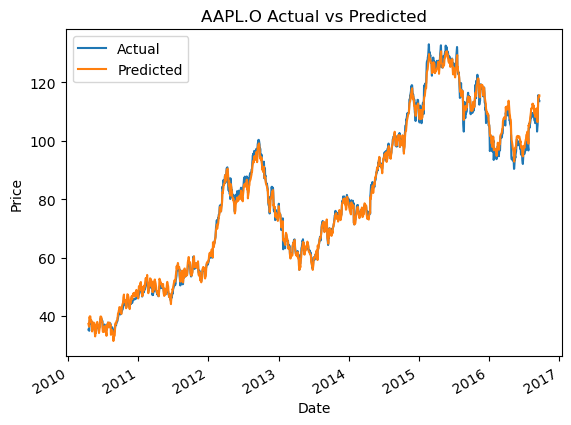

In [37]:
AAPLO_train[['AAPL.O', 'Predict_Step']].plot(ylabel = 'Price', title = 'AAPL.O Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'AAPL.O train'}, xlabel='Date'>

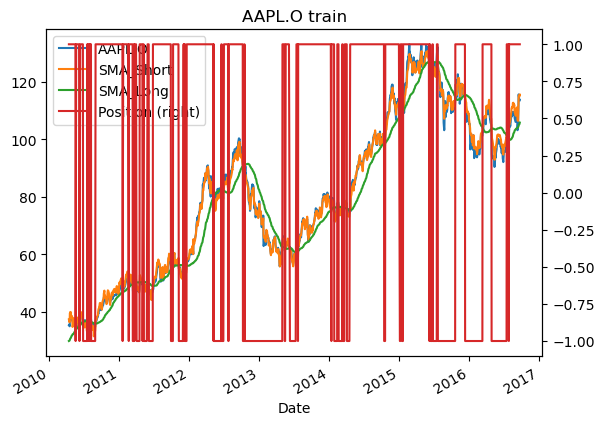

In [38]:
AAPLO_train[['AAPL.O', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'AAPL.O train')

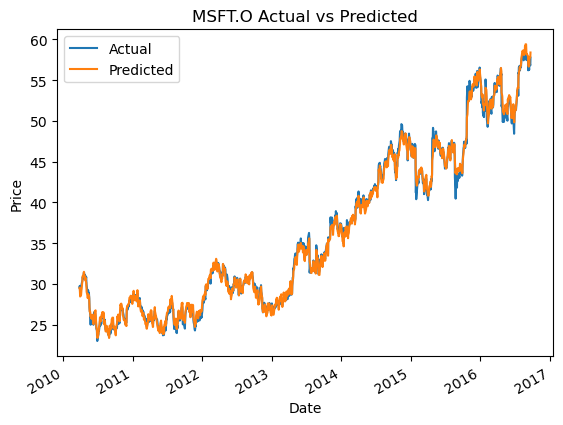

In [39]:
MSFTO_train[['MSFT.O', 'Predict_Step']].plot(ylabel = 'Price', title = 'MSFT.O Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'MSFT.O train'}, xlabel='Date'>

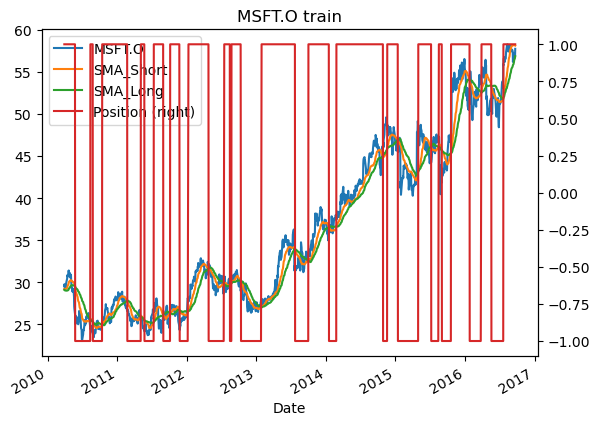

In [40]:
MSFTO_train[['MSFT.O', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'MSFT.O train')

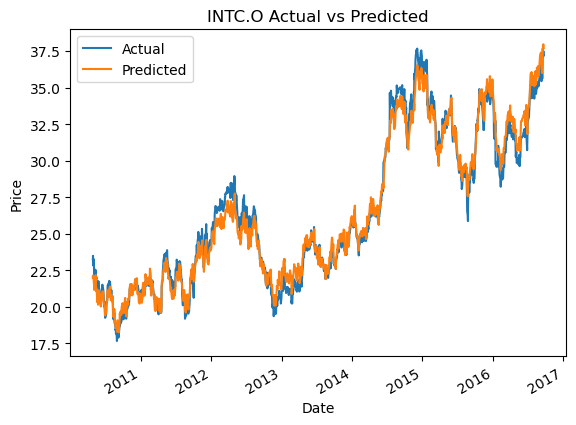

In [41]:
INTCO_train[['INTC.O', 'Predict_Step']].plot(ylabel = 'Price', title = 'INTC.O Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'INTC.O train'}, xlabel='Date'>

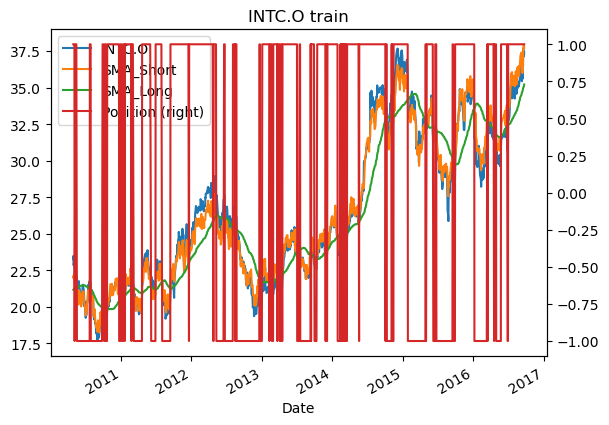

In [42]:
INTCO_train[['INTC.O', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'INTC.O train')

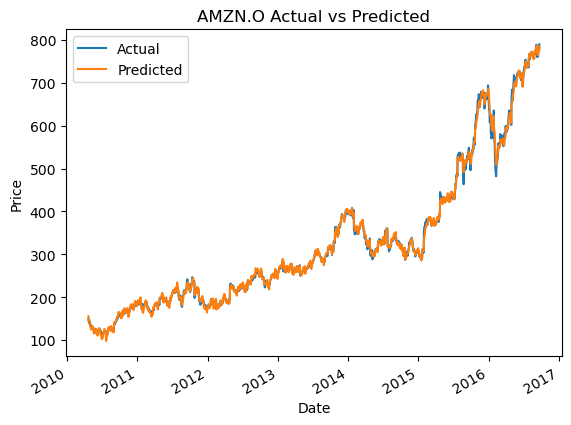

In [43]:
AMZNO_train[['AMZN.O', 'Predict_Step']].plot(ylabel = 'Price', title = 'AMZN.O Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'AMZN.O train'}, xlabel='Date'>

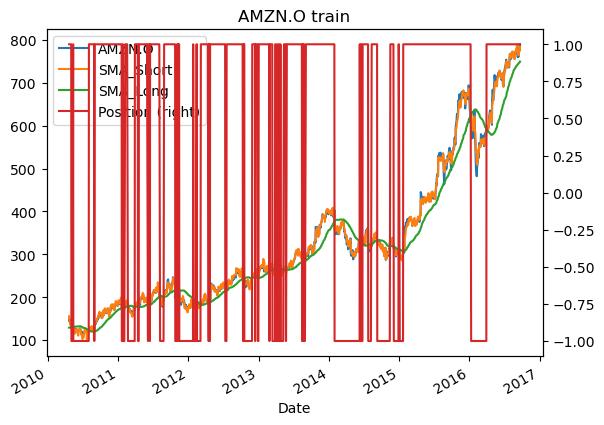

In [44]:
AMZNO_train[['AMZN.O', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'AMZN.O train')

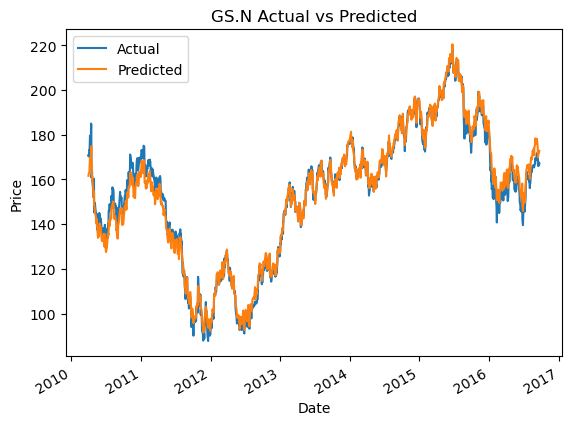

In [45]:
GSN_train[['GS.N', 'Predict_Step']].plot(ylabel = 'Price', title = 'GS.N Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'GS.N train'}, xlabel='Date'>

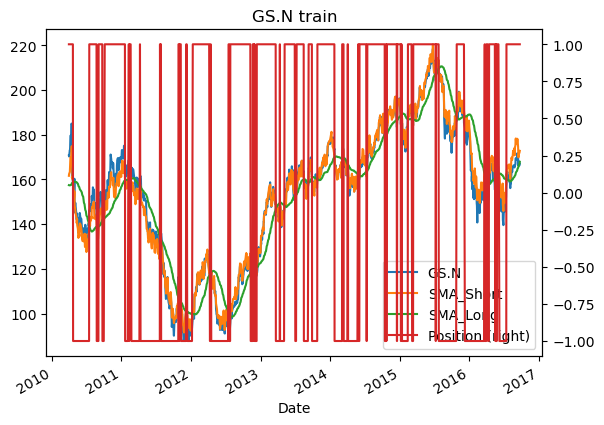

In [46]:
GSN_train[['GS.N', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'GS.N train')

#### Summary from predicting test data

In [47]:
statistics(AAPLO_test).join(statistics(MSFTO_test)).join(statistics(INTCO_test)).join(statistics(AMZNO_test)).join(statistics(GSN_test))

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Actual return,1.650999,1.616292,1.351182,2.211381,0.912012
Predicted return,1.671735,1.626077,1.381398,2.212890,0.971749
Norm Mean Squared error,0.010511,0.004124,0.010319,0.004234,0.041633
Strategy return,0.912977,1.616292,1.078916,2.085940,0.984166
Number of trades,9.000000,0.000000,21.000000,5.000000,19.000000


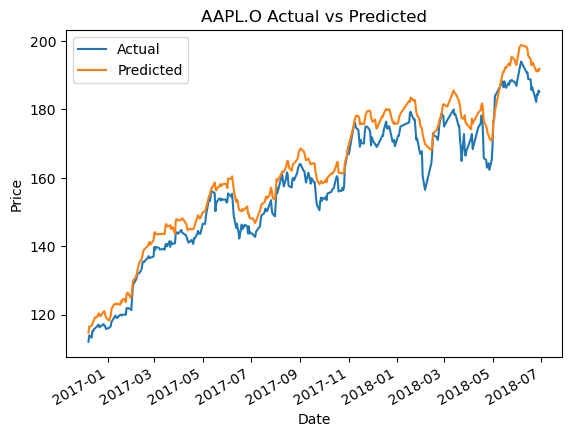

In [48]:
AAPLO_test[['AAPL.O', 'Predict_Step']].plot(ylabel = 'Price', title = 'AAPL.O Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'AAPL.O test'}, xlabel='Date'>

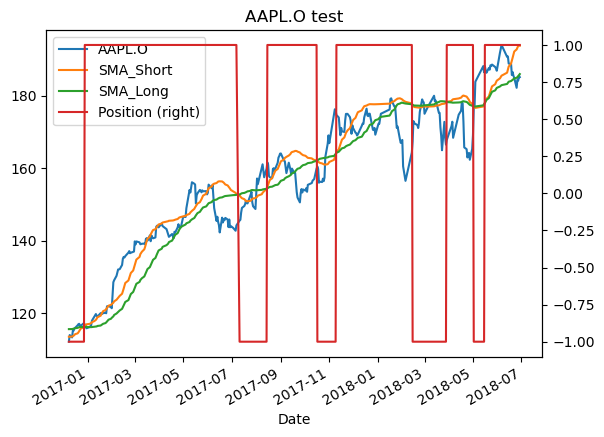

In [49]:
AAPLO_test[['AAPL.O', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'AAPL.O test')

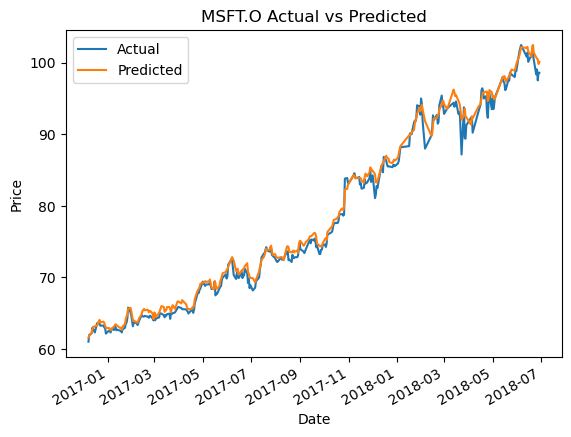

In [50]:
MSFTO_test[['MSFT.O', 'Predict_Step']].plot(ylabel = 'Price', title = 'MSFT.O Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'MSFT.O test'}, xlabel='Date'>

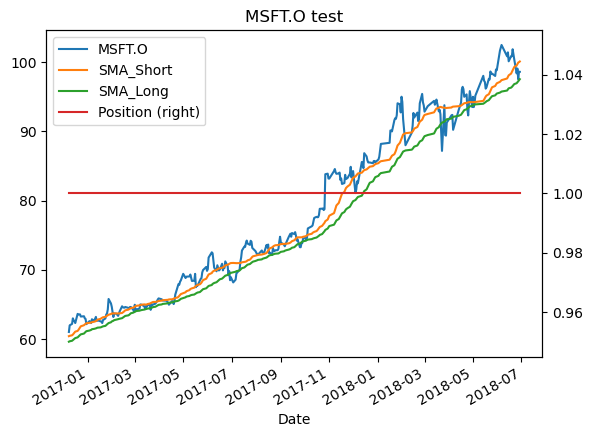

In [51]:
MSFTO_test[['MSFT.O', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'MSFT.O test')

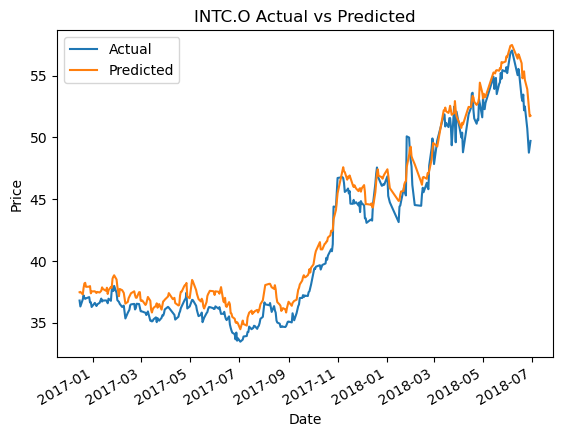

In [52]:
INTCO_test[['INTC.O', 'Predict_Step']].plot(ylabel = 'Price', title = 'INTC.O Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'INTC.O test'}, xlabel='Date'>

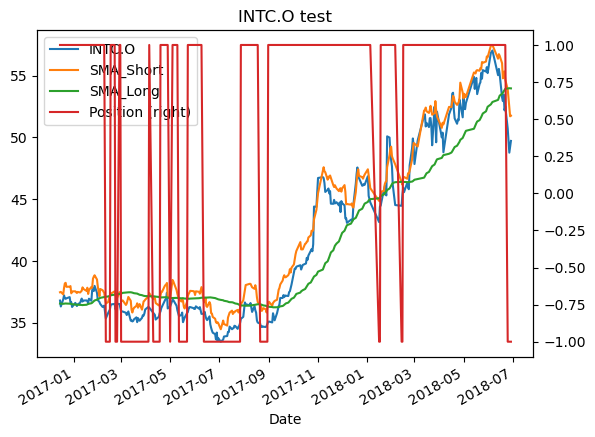

In [53]:
INTCO_test[['INTC.O', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'INTC.O test')

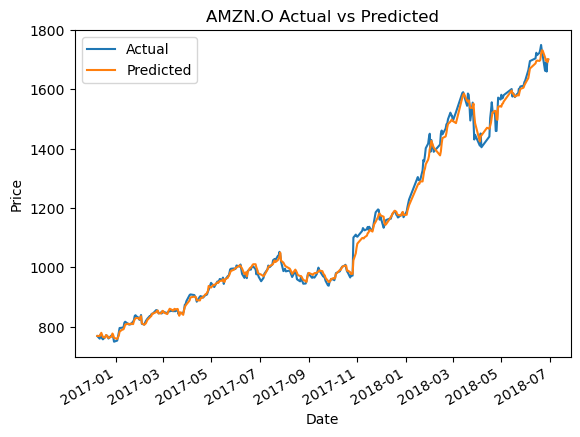

In [54]:
AMZNO_test[['AMZN.O', 'Predict_Step']].plot(ylabel = 'Price', title = 'AMZN.O Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'AMZN.O test'}, xlabel='Date'>

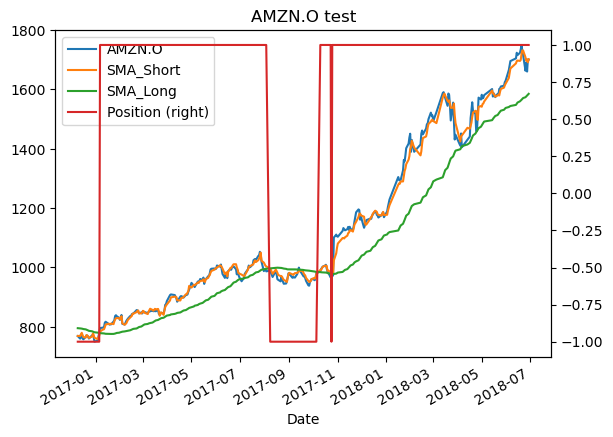

In [55]:
AMZNO_test[['AMZN.O', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'AMZN.O test')

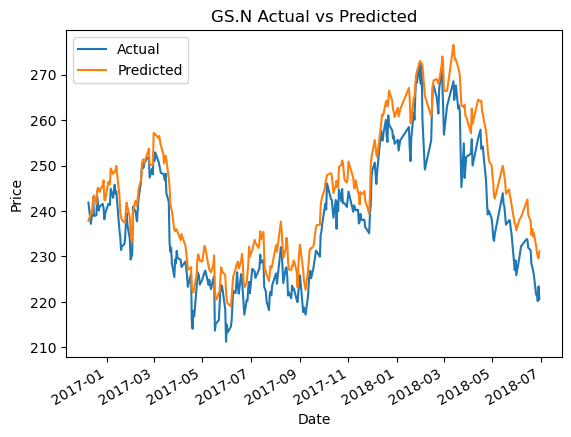

In [56]:
GSN_test[['GS.N', 'Predict_Step']].plot(ylabel = 'Price', title = 'GS.N Actual vs Predicted').legend(labels = ['Actual', 'Predicted'])

<Axes: title={'center': 'GS.N test'}, xlabel='Date'>

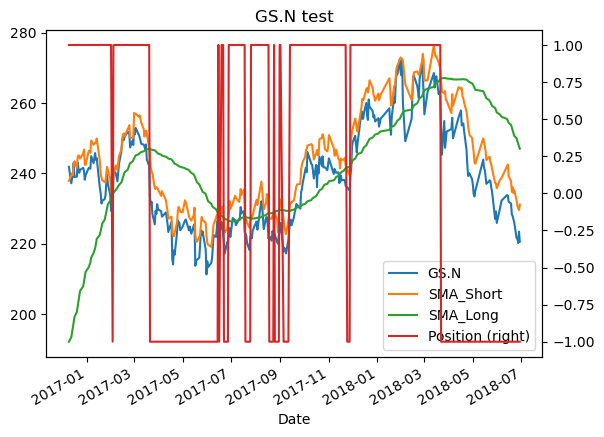

In [57]:
GSN_test[['GS.N', 'SMA_Short', 'SMA_Long', 'Position']].plot(secondary_y = 'Position', title = 'GS.N test')

In [58]:
end = time.time()
end-start

291.13670110702515